In [190]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(10, 6)})
sns.set_theme(style="whitegrid")

This dataset was created by BuzzFeedNews, they sourced the official data from 17 ISU (International Skating Union) competitions results. 

In [191]:
url = 'https://github.com/BuzzFeedNews/figure-skating-scores/blob/master/data/tidy/performances.csv?raw=true'
df = pd.read_csv(url,index_col=0)

url = 'https://github.com/BuzzFeedNews/figure-skating-scores/blob/master/data/tidy/judged-aspects.csv?raw=true'
judge_aspect = pd.read_csv(url,index_col=0)
#print(judge_aspect.head())

In [192]:
#Here I am combining both the Mens Short Program and Mens Free Skate
mens_fs = df.loc[df['program'] == 'MEN FREE SKATING']
mens_sp = df.loc[df['program'] == 'MEN SHORT PROGRAM']
mens = pd.concat([mens_fs, mens_sp])

Figure skating scoring: https://www.vox.com/culture/2018/2/14/17004314/figure-skating-scoring-winter-olympics-2018

In [193]:
mens_grouped = mens.groupby(['name', 'competition','nation'], as_index=False).sum()
mens_grouped = mens_grouped.sort_values(by=['total_segment_score'], ascending=False).reset_index()
#Here are the top scores from the 2016-2017 season & 2017-2018 season combined
mens_grouped = mens_grouped.loc[mens_grouped['total_segment_score'] >= 200]
print(mens_grouped.head())

   index          name                                  competition nation  \
0    245  Yuzuru HANYU  ISU World Figure Skating Championships 2017    JPN   
1    223     Shoma UNO  ISU World Figure Skating Championships 2017    JPN   
2    185   Nathan CHEN       ISU Four Continents Championships 2017    USA   
3    240  Yuzuru HANYU       ISU Four Continents Championships 2017    JPN   
4     33    Boyang JIN  ISU World Figure Skating Championships 2017    CHN   

   rank  starting_number  total_segment_score  total_element_score  \
0     6               50               321.59               178.16   
1     4               55               319.31               179.19   
2     3               43               307.46               175.06   
3     4               45               303.71               162.44   
4     7               47               303.58               176.59   

   total_component_score  total_deductions  
0                 144.43               1.0  
1                 14

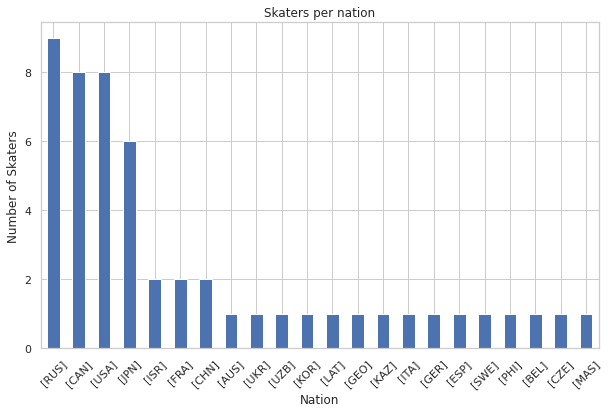

In [194]:
unique_men = mens_grouped.groupby('name')['nation'].unique().reset_index()
skaters_per_country = unique_men['nation'].value_counts()
skaters_per_country.plot.bar(rot=0).set(title='Skaters per nation', \
                            xlabel='Nation', ylabel='Number of Skaters')
plt.xticks(rotation=45)
plt.show()

I filtered the combined scores by scores that were over 200 to eliminate some countries that are less likely to medal. Ideally, a male figure skater must score at least 300 points to to place on the podium. The bar chart above shows the number of skatings that each nation is sending to these competitions. As we can see, Russia, Canada, United States and Japan have the most skaters that are consistently scoring over 200 points in competition. 

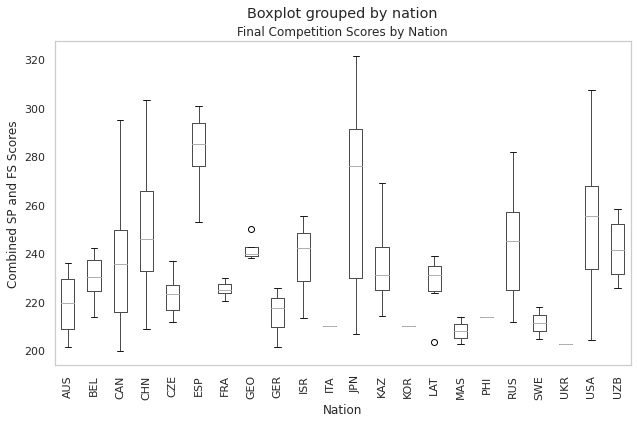

In [195]:
ax = mens_grouped.boxplot(by='nation', column=['total_segment_score'], grid=False).set(\
                            title='Final Competition Scores by Nation',  xlabel='Nation', ylabel='Combined SP and FS Scores')
plt.xticks(rotation=90)
plt.show()
#ax.set_ylabel('Scores of SP and FS combined')

From this violinplot, we can see the distribution of the top scores over the 17 competitions by nation. These scores are the combination of the short program and free skate, the final score that is used for final ranking for competiton.

In [196]:
mens_fsa = mens_fs.loc[mens_fs['total_segment_score'] >= 100]
#mens_fs =mens_fs.sort_values(by=['total_segment_score'], ascending=False).reset_index()

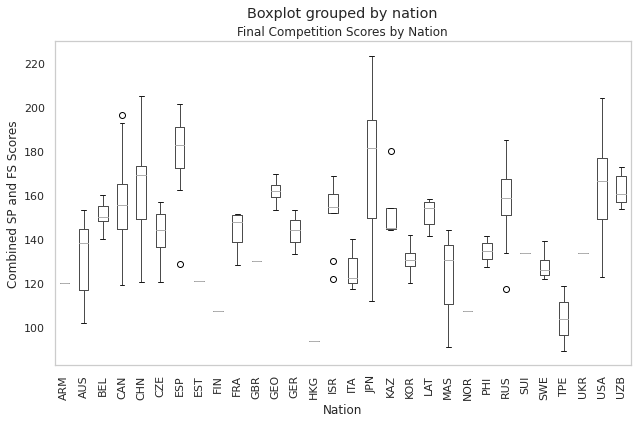

In [197]:
ax = mens_fs.boxplot(by='nation', column=['total_segment_score'], grid=False).set(\
                            title='Final Competition Scores by Nation',  xlabel='Nation', ylabel='Combined SP and FS Scores')
plt.xticks(rotation=90)
plt.show()

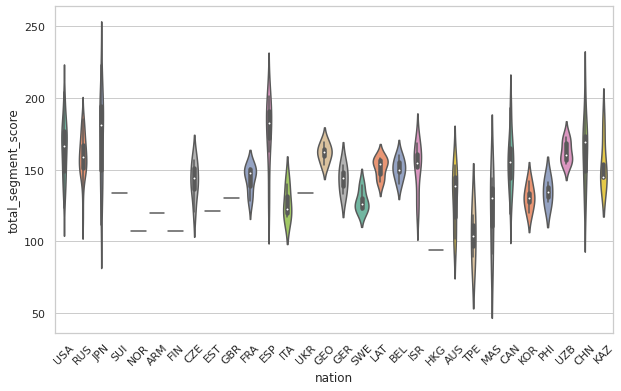

In [198]:
#Plotting the top fifty scores of the two seasons grouped by nation
ax = sns.violinplot(x='nation',y="total_segment_score",palette="Set2", data=mens_fs)
plt.xticks(rotation=45)
plt.show()

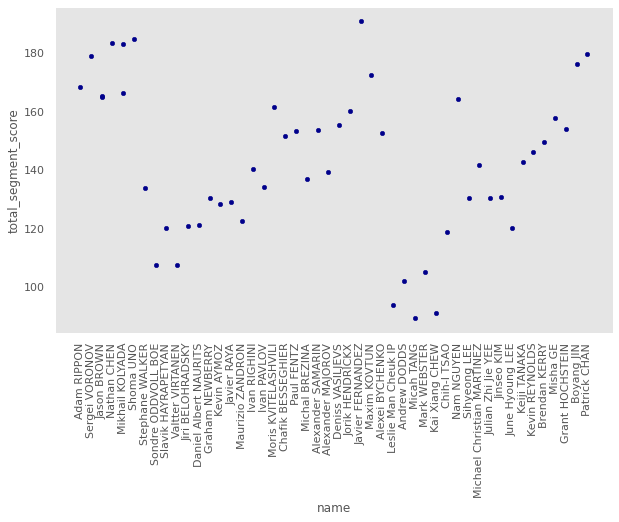

In [199]:
#Plotting the top fifty scores of the two seasons grouped by name
plt.style.use('ggplot')
mens_fs[:50].plot(kind='scatter',x='name', y ='total_segment_score', grid = False, c='DarkBlue')
plt.xticks(rotation=90);
plt.show()

In [200]:
judge = pd.DataFrame()
for index, row in mens_fs.iterrows():
    goe = judge_aspect.loc[judge_aspect['performance_id'] == row['performance_id']]
    judge = judge.append(goe)
print(judge.head())

KeyError: 'performance_id'

In [ ]:
judge_grouped = judge.groupby(['performance_id','section'], as_index=False).mean()
judge_grouped.sort_values(by=['scores_of_panel'], ascending=False).reset_index()

In [168]:
components = []
elements = []
#fig, ax = plt.subplots()
for index, row in mens_fs.iterrows():
    curr = judge_grouped.loc[judge_grouped['performance_id'] == row['performance_id']].reset_index()
    component = curr.head(1)
    #print(component['scores_of_panel'][0])
    components.append(component['scores_of_panel'].iloc[0])
    element = curr.tail(1)
    elements.append(element['scores_of_panel'].iloc[0])
#print(components)

mens_fs['components_score'] = components
mens_fs['elements_score'] = elements
print(mens_fs.head())

   index performance_id                                  competition  \
0      0     144b32e23f  ISU World Figure Skating Championships 2017   
1      1     fc8d373a8e  ISU World Figure Skating Championships 2017   
2      2     3ba00e375c       ISU Four Continents Championships 2017   
3      3     4f123a1abc  ISU World Figure Skating Championships 2017   
4      4     5714d43e36       ISU Four Continents Championships 2017   

            program          name nation  rank  starting_number  \
0  MEN FREE SKATING  Yuzuru HANYU    JPN     1               19   
1  MEN FREE SKATING     Shoma UNO    JPN     2               23   
2  MEN FREE SKATING  Yuzuru HANYU    JPN     1               23   
3  MEN FREE SKATING    Boyang JIN    CHN     3               21   
4  MEN FREE SKATING   Nathan CHEN    USA     2               24   

   total_segment_score  total_element_score  total_component_score  \
0               223.20               126.12                  97.08   
1               214.45  